# Network Intrusion Detection 

In [321]:
from __future__ import print_function
import pandas as pd
import numpy as np
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from sklearn.metrics import (precision_score, recall_score,f1_score, accuracy_score)
from sklearn.preprocessing import Normalizer
import h5py
from tensorflow.keras import callbacks
from tensorflow.keras.callbacks import CSVLogger
from tensorflow.keras.callbacks import TensorBoard
from sklearn.metrics import confusion_matrix

In [322]:
traindata = pd.read_csv('Training.csv', header=None)
testdata = pd.read_csv('Testing.csv', header=None)

In [323]:
traindata = traindata.sample(30000)
testdata = testdata.sample(6000)

In [324]:
traindata[0].value_counts()

1    24157
0     5843
Name: 0, dtype: int64

In [325]:
testdata[0].value_counts()

1    4849
0    1151
Name: 0, dtype: int64

In [326]:
# Class count
count_class_1, count_class_0 = traindata[0].value_counts()

# Divide by class
df_train_class_0 = traindata[traindata[0] == 0]
df_train_class_1 = traindata[traindata[0] == 1]

In [327]:
# Oversample 

df_train_class_0_over = df_train_class_0.sample(count_class_1, replace=True)
df_train_over = pd.concat([df_train_class_1, df_train_class_0_over], axis=0)

print('Random over-sampling:')
print(df_train_over[0].value_counts())

Random over-sampling:
1    24157
0    24157
Name: 0, dtype: int64


In [328]:
# Class count
count_class_1, count_class_0 = testdata[0].value_counts()

# Divide by class
df_test_class_0 = testdata[testdata[0] == 0]
df_test_class_1 = testdata[testdata[0] == 1]

In [329]:
# Oversample

df_test_class_0_over = df_test_class_0.sample(count_class_1, replace=True)
df_test_over = pd.concat([df_test_class_1, df_test_class_0_over], axis=0)

print('Random over-sampling:')
print(df_test_over[0].value_counts())

Random over-sampling:
1    4849
0    4849
Name: 0, dtype: int64


In [330]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [331]:
X = df_train_over.iloc[:,1:5]
Y = df_train_over.iloc[:,0]
C = df_test_over.iloc[:,0]
T = df_test_over.iloc[:,1:5]

In [332]:
Y.value_counts()

1    24157
0    24157
Name: 0, dtype: int64

In [333]:
scaler = Normalizer().fit(X)
trainX = scaler.transform(X)

scaler = Normalizer().fit(T)
testT = scaler.transform(T)

In [334]:
y_train = np.array(Y)
y_test = np.array(C)


X_train = np.array(trainX)
X_test = np.array(testT)

In [335]:
batch_size = 64

In [336]:
model = Sequential()
model.add(Dense(1000,input_dim=4,activation='relu'))  
model.add(Dropout(0.5))
model.add(Dense(700,activation='relu'))  
model.add(Dropout(0.5))
model.add(Dense(300,activation='relu'))  
model.add(Dropout(0.5))
model.add(Dense(100,activation='relu'))  
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

tensorboard = TensorBoard(log_dir='./logs',
                          histogram_freq=0,
                          write_graph=True,
                          write_images=True)
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

checkpointer = callbacks.ModelCheckpoint(filepath="dnn-kdd-results/checkpoint-{epoch:02d}.h5", 
                                         verbose=1, save_best_only=True, monitor='loss')
csv_logger = CSVLogger('dnn-kdd-results/training_set_dnnanalysis.csv',separator=',', append=False)
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=10, validation_data=(X_test,y_test), callbacks=[checkpointer,csv_logger, tensorboard])
model.save("dnn-kdd-results/dnn_model.h5")
print(model.summary)

Epoch 1/10
752/755 [============================>.] - ETA: 0s - loss: 0.3109 - accuracy: 0.8794
Epoch 00001: loss improved from inf to 0.31043, saving model to dnn-kdd-results/checkpoint-01.h5
755/755 [==============================] - 2s 2ms/step - loss: 0.3104 - accuracy: 0.8796 - val_loss: 0.2771 - val_accuracy: 0.9154
Epoch 2/10
754/755 [============================>.] - ETA: 0s - loss: 0.1074 - accuracy: 0.9747
Epoch 00002: loss improved from 0.31043 to 0.10739, saving model to dnn-kdd-results/checkpoint-02.h5
755/755 [==============================] - 1s 2ms/step - loss: 0.1074 - accuracy: 0.9747 - val_loss: 0.2193 - val_accuracy: 0.9496
Epoch 3/10
753/755 [============================>.] - ETA: 0s - loss: 0.0853 - accuracy: 0.9835
Epoch 00003: loss improved from 0.10739 to 0.08524, saving model to dnn-kdd-results/checkpoint-03.h5
755/755 [==============================] - 1s 2ms/step - loss: 0.0852 - accuracy: 0.9835 - val_loss: 0.1855 - val_accuracy: 0.9496
Epoch 4/10
749/755 [

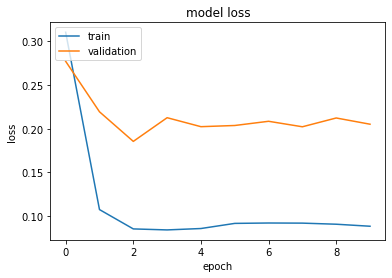

In [337]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

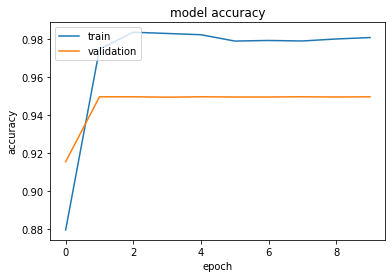

In [338]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

----------------------------------------------
accuracy
0.915
----------------------------------------------
accuracy
0.915
----------------------------------------------
accuracy
0.915
----------------------------------------------
accuracy
0.915
----------------------------------------------
accuracy
0.915
----------------------------------------------
accuracy
0.915
----------------------------------------------
accuracy
0.915
----------------------------------------------
accuracy
0.949
Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.92      0.92      4849
           1       0.92      0.91      0.91      4849

    accuracy                           0.92      9698
   macro avg       0.92      0.92      0.92      9698
weighted avg       0.92      0.92      0.92      9698

[[4481  368]
 [ 452 4397]]


/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:54: UserWarning: FixedFormatter should only be used together with FixedLocator
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:55: UserWarning: FixedFormatter should only be used together with FixedLocator


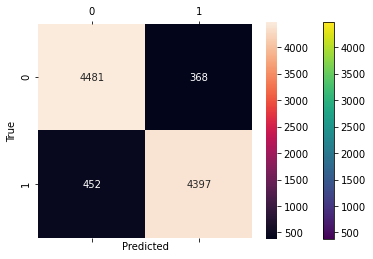

In [339]:
score = []
name = []

for file in os.listdir("dnn-kdd-results"):
    model.load_weights("dnn-kdd-results/checkpoint-01.h5")
    y_train1 = y_test
    y_pred = model.predict_classes(X_test)
    accuracy = accuracy_score(y_train1, y_pred)
    recall = recall_score(y_train1, y_pred , average="binary")
    precision = precision_score(y_train1, y_pred , average="binary")
    f1 = f1_score(y_train1, y_pred, average="binary")
    print("----------------------------------------------")
    print("accuracy")
    print("%.3f" %accuracy)
    score.append(accuracy)
    name.append(file)


model.load_weights("dnn-kdd-results/"+name[score.index(max(score))])
pred = model.predict_classes(X_test)
proba = model.predict_proba(X_test)
np.savetxt("dnn-kdd-results/dnn4predicted.txt", pred)
np.savetxt("dnn-kdd-results/dnn4probability.txt", proba)

accuracy = accuracy_score(y_test, pred)
recall = recall_score(y_test, pred , average="binary")
precision = precision_score(y_test, pred , average="binary")
f1 = f1_score(y_test, pred, average="binary")


print("----------------------------------------------")
print("accuracy")
print("%.3f" %accuracy)

from sklearn.metrics import classification_report, confusion_matrix 
print("Classification Report: \n", classification_report(y_test, y_pred))

import matplotlib.pylab as plt
import seaborn as sn
%matplotlib inline
matrix = confusion_matrix(y_test, y_pred)
print (matrix)

#Plotting the Confusion Matrix
labels = ['Normal', 'Intruder']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(matrix)

fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
sn.heatmap(matrix, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Medium article link: https://vomchaithanya.medium.com/network-intrusion-detection-ffb4d79f9edb